Example Notebook for using secondaryStructure.py
========================================
* Import necessary modules for your analysis.
* Import data and set data paths.
* Make a secondary structure graph with RInG data.
* Make a secondary structure graph with PAIR data. (not yet available)


Importing modules.
------------------
I like to put this at the top of my notebook, all in one place, so that I can see my whole
python environment. The first line, `%matplotlib inline` ensures that plots are rendered
within the notebook. You can use `sys.path.append('path/to/module')` to add modules that are
not normally in your path.

In [1]:
# Set up Python environment

%matplotlib inline
# import sys
# sys.path.append('/nas/longleaf/home/psirving/JNBTools')
import secondaryStructure as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Defining data path and reading in data
--------------------------------------
This is where I read in all of my data and set paths to files.

For plottingTools.py functions, a pandas dataframe object is passed.

For JNBarcPlot.py, only the file paths are needed.

In [2]:
path = 'data/'
xrnapath = path+'RNaseP-Cat_structure.xrna'
profilepath = path+'example1_rnasep_profile.txt'
ringpath = path+'example-rnasep.corrs'

Make a secondary structure graph with RInG data
-----------------------------------------------

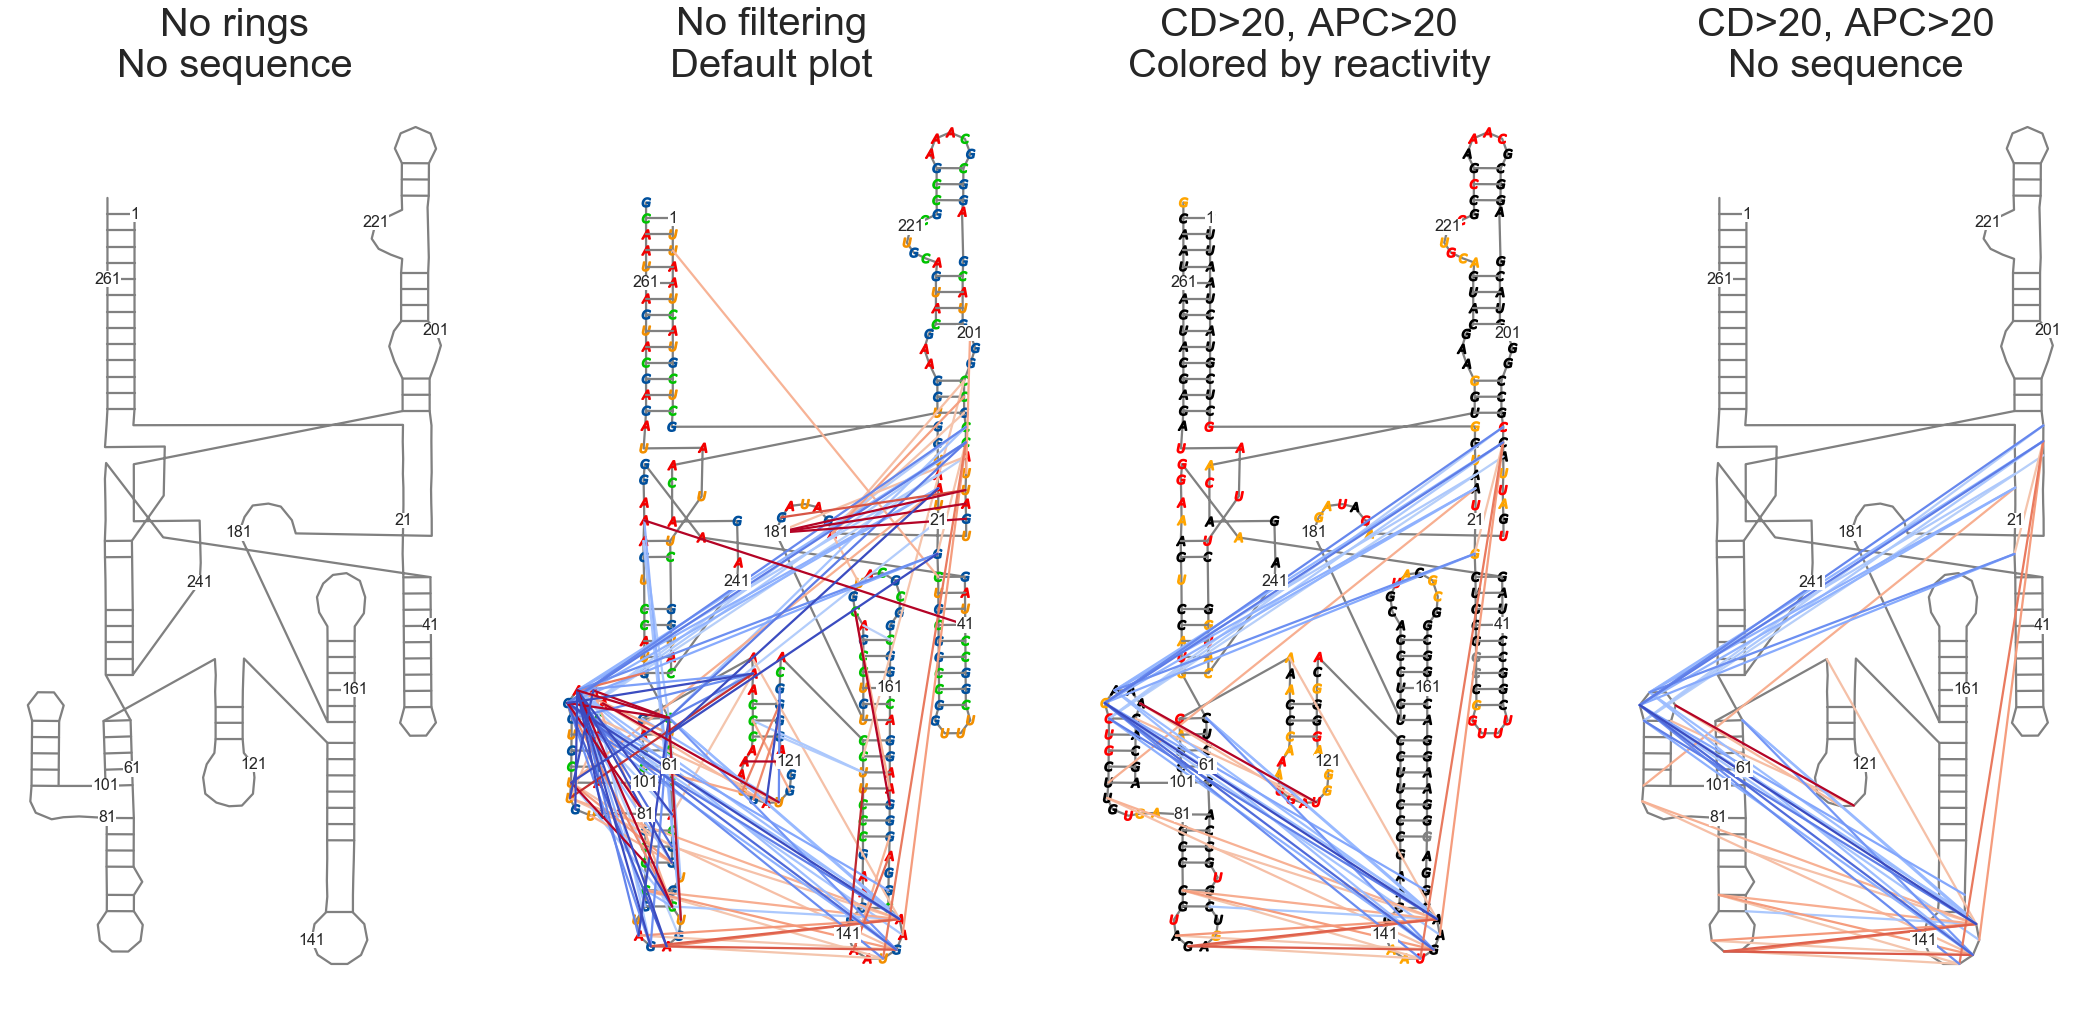

In [3]:
# Figsize will need to be adjusted for best results. figsize=(width, height)
fig, ax = plt.subplots(1,4, figsize=(30,14))

# I'm using an xrna file, so I set xrnafile.
# Other parameters are ctefile and nsdfile (both from Structure Editor)
RNaseP = ss.SecondaryStructure(xrnafile=xrnapath, ringfile=ringpath, profile=profilepath)
# Ring file needs to be reindexed because it was aligned to structure cassettes
RNaseP.filterRings(structureCassettes=True)
# Plot 1: Don't plot sequence or rings
RNaseP.makePlot(ax[0], sequence=False, rings=False)
# Plot 2: default plot
RNaseP.makePlot(ax[1])

# Filter rings for contact distance > 20 and APC > 20.
# Contact distance based on the pairs in structure file. Currently, does not accept a ct file.
# Reindexing needs to be done again, because filterRings reloads the original rings file.
RNaseP.filterRings(contactDistance=20, statistic=20, structureCassettes=True)
# Plot 3: default plot, colored by profile
RNaseP.makePlot(ax[2], colorby='profile')
# Plot 4: default plot, don't plot sequence  <- my personal favorite
RNaseP.makePlot(ax[3], sequence=False)

titles = ['No rings\nNo sequence',
          'No filtering\nDefault plot',
          'CD>20, APC>20\nColored by reactivity',
          'CD>20, APC>20\nNo sequence']
for i in range(4):
    ax[i].set_title(titles[i], fontsize=40)
plt.tight_layout();


Make arc plot with RInG data
----------------------------
This functionality is coming soon. There will be options to add cutoffs based on statistics and contact distance.